In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

### Train

In [2]:
train = pd.read_csv('../../ml-data/cyberattack_detection/3_selected_features/A1_train_data_PCA.csv', sep=',')

In [3]:
train.head()

,PC1,PC2,PC3
0,277104.332320,17405.523770,-13546.742781
1,-150864.801811,-435.860958,-43929.108886
2,-120787.105699,572.759831,-43403.206845
3,254876.957762,14623.397761,-36966.671201
4,-117895.439420,621.683934,-43348.286842


In [4]:
# set contamination = 0.01
isolation_forest = IsolationForest(contamination=0.01)

In [5]:
isolation_forest.fit(train)

IsolationForest(contamination=0.01)

### Test

In [6]:
test = pd.read_csv('../../ml-data/cyberattack_detection/3_selected_features/A1_test_data_PCA.csv', sep=',')

In [7]:
test.shape

(1053845, 3)

In [8]:
test_predict = isolation_forest.predict(test)
decision_function = isolation_forest.decision_function(test)

In [9]:
test['anomaly'] = test_predict
test['score'] = decision_function

In [10]:
test['anomaly'].value_counts()

 1    1051771
-1       2074
Name: anomaly, dtype: int64

In [11]:
test.loc[test['anomaly'] == -1]

,PC1,PC2,PC3,anomaly,score
8409,-179115.493809,-124669.409581,-40542.294889,-1,-0.033682
8411,-183190.068498,-124821.159127,-40612.166475,-1,-0.034171
8413,-159434.039120,-123936.412390,-40204.793541,-1,-0.024036
8418,-152841.581102,-123690.889217,-40091.744810,-1,-0.022589
8422,-78654.946457,-120927.953466,-38819.578213,-1,-0.004389
...,...,...,...,...,...
920341,-72178.484741,-123790.985210,-66002.622726,-1,-0.032945
920342,39991.931750,-118317.733704,-56684.154788,-1,-0.021569
920343,-72178.770806,-123789.728675,-65988.684977,-1,-0.032945
1004000,386700.065874,-105382.110815,-49725.463993,-1,-0.022036


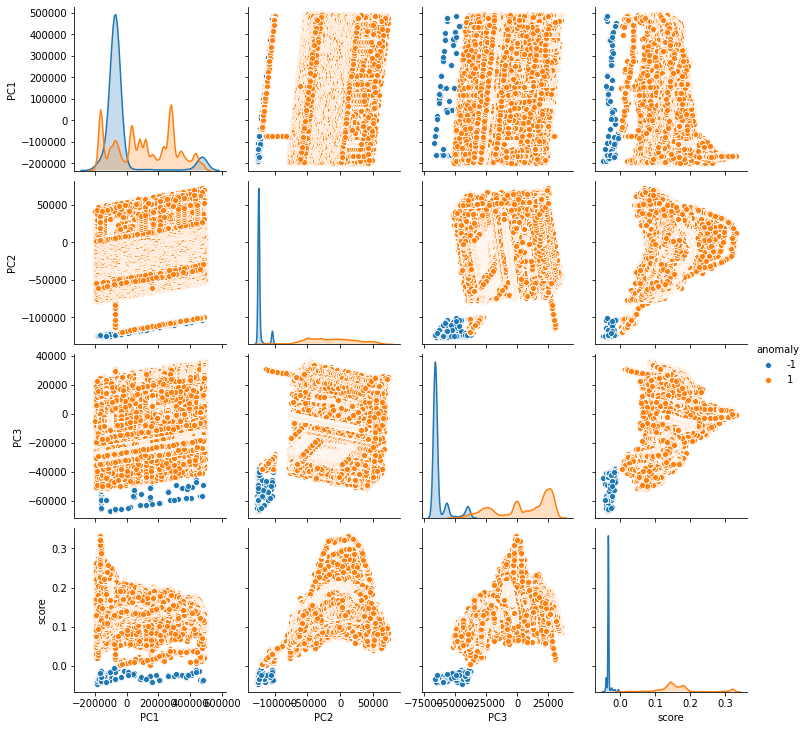

In [27]:
sns.pairplot(test, hue = 'anomaly')

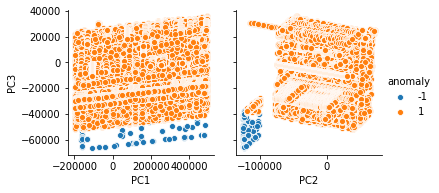

In [29]:
sns.pairplot(
    test, hue = 'anomaly',
    x_vars=["PC1", "PC2"],
    y_vars=["PC3"],
)

In [12]:
anomalies = test.loc[test['anomaly'] == -1]

In [13]:
anomalies.head(40)

,PC1,PC2,PC3,anomaly,score
8409,-179115.493809,-124669.409581,-40542.294889,-1,-0.033682
8411,-183190.068498,-124821.159127,-40612.166475,-1,-0.034171
8413,-159434.039120,-123936.412390,-40204.793541,-1,-0.024036
8418,-152841.581102,-123690.889217,-40091.744810,-1,-0.022589
8422,-78654.946457,-120927.953466,-38819.578213,-1,-0.004389
8440,-53235.315593,-119981.249155,-38383.677523,-1,-0.003186
8805,-93373.573172,-121476.119860,-39071.976039,-1,-0.014193
8829,-65858.703680,-120451.382493,-38600.145795,-1,-0.005329
8993,-155973.947862,-123807.548076,-40145.459234,-1,-0.024036
22539,-191586.010409,-125133.849521,-40756.141692,-1,-0.039082


In [14]:
original_test = pd.read_csv('../../ml-data/cyberattack_detection/1_raw_data/A2_1/clean_test_data', sep=',')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
anomalies_orig_feat = original_test[original_test.index.isin(anomalies.index)]

In [16]:
anomalies_orig_feat = anomalies_orig_feat.merge(anomalies[['score']], left_index = True, right_index=True)

In [17]:
anomalies_orig_feat.head(40)

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes,PacketsSec,TotalBytesSec,SourceBytesSec,score
8409,2012/12/01 15:57:06.447464,0.000000,icmp,224.134.91.164,0x0303,->,122.173.93.20,0xe11a,URP,0.0,NaN,2,131,130,inf,inf,inf,-0.033682
8411,2012/12/01 15:57:07.483388,0.000000,icmp,224.134.91.164,0x0303,->,121.233.53.53,0xe11a,URP,0.0,NaN,2,143,131,inf,inf,inf,-0.034171
8413,2012/12/01 15:57:07.765787,3682.998250,icmp,224.134.91.164,0x0303,->,125.60.236.177,0xe11a,URP,0.0,NaN,104,10259,10639,0.028238,2.785502,2.888679,-0.024036
8418,2012/12/01 15:57:08.535773,0.000000,icmp,224.134.91.164,0x0303,->,127.10.36.194,0xe11a,URP,0.0,NaN,1,131,133,inf,inf,inf,-0.022589
8422,2012/12/01 15:57:08.725312,0.000000,icmp,224.134.91.164,0x0303,->,140.103.251.10,0xe11a,URP,0.0,NaN,2,141,141,inf,inf,inf,-0.004389
8440,2012/12/01 15:57:12.554712,0.000000,icmp,224.134.91.164,0x0303,->,144.207.66.230,0xe11a,URP,0.0,NaN,2,136,138,inf,inf,inf,-0.003186
8805,2012/12/01 15:58:31.270585,0.000000,icmp,224.134.91.164,0x0303,->,137.196.120.216,0xe11a,URP,0.0,NaN,1,139,137,inf,inf,inf,-0.014193
8829,2012/12/01 15:58:34.507969,0.000000,icmp,224.134.91.164,0x0303,->,142.161.101.166,0xe11a,URP,0.0,NaN,1,132,135,inf,inf,inf,-0.005329
8993,2012/12/01 15:58:47.292931,0.000000,icmp,224.134.91.164,0x0303,->,126.193.11.172,0xe11a,URP,0.0,NaN,1,136,138,inf,inf,inf,-0.024036
22539,2012/12/01 16:00:00.346430,2.987838,icmp,224.134.91.164,0x0303,->,120.134.117.12,0xe11a,URP,0.0,NaN,2,190,209,0.669380,63.591132,69.950245,-0.039082


In [21]:
anomalies_orig_feat['SrcIPAddress'].nunique()

18

In [26]:
import numpy as np
anomalies_orig_feat.loc[anomalies_orig_feat['PacketsSec'] != np.inf].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))


,Duration,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes,PacketsSec,TotalBytesSec,SourceBytesSec,score
count,1963,1963,151,1963,1963,1963,1963,1963,1963,1963
mean,842.354,0,0,20.9185,20568.3,20602.1,7206.39,339330,168781,-0.0325907
std,564.145,0,0,13.0645,13764.5,13807.1,39870.9,1.78779e+06,898159,0.00453723
min,4e-06,0,0,2,114,57,0.000933159,0.0836732,0.0777632,-0.0416532
25%,355.128,0,0,11,10416,10640.5,0.0137178,13.3497,13.2706,-0.0329448
50%,961.142,0,0,18,17813,17684,0.0332077,34.1602,34.406,-0.0329448
75%,1132.72,0,0,32,32616.5,32712.5,0.046458,47.1843,47.5769,-0.0329448
max,3707.61,0,0,104,54564,56926,750000,3.05e+07,1.55e+07,-5.1067e-05


In [18]:
anomalies_orig_feat.to_csv('../4 Results/A1_test_iForest_PCA_0.01_orig_feat.csv', sep=',')

End